# Course 06 Custom Functions Tester

In [1]:
import tensorflow as tf
import numpy as np

# Then Set Random Seeds
tf.keras.utils.set_random_seed(42)
tf.random.set_seed(42)
np.random.seed(42)

# Then run the Enable Deterministic Operations Function
tf.config.experimental.enable_op_determinism()

# Source: https://discuss.tensorflow.org/t/upgrading-os-to-sonoma-on-my-mac-causing-tensorflow-errors/19846/5
tf.config.set_visible_devices([], 'GPU')


In [2]:
%load_ext autoreload
%autoreload 2

import custom_functions as fn

In [3]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np
from imblearn.under_sampling import RandomUnderSampler
import spacy
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
import tensorflow as tf
# Increase column width
pd.set_option('display.max_colwidth', 250)
import tensorflow as tf


In [4]:
import pandas as pd

df = pd.read_csv("data/yelp-reviews-filtered.csv")
df

,review_id,text,stars
0,Ebl0LmHkLsQk9hP0rBm3GA,"Ate here twice and had both atmosphere and great tapas. The Jamon plate, bravas, Spanish omelette, stuffed date, pork, Brussels sprouts, wine and amazing pear dessert...I could go on and on. If visiting, Please make a reservation as soon as you a...",5
1,DBa7PNBoBGJMc2qXXl4pRA,"My boyfriend and I got recommended this place by a SB local! We were just amazed! Everything from the look and feel of the place to the appetizer to the main dish, the dessert and the service was just perfect! Our food was just amazing!!!",5
2,BMfEah7vUKUvQeUTCR34iQ,"I had no expectations being a first time customer, however it didn't live up to the expectations. It being a busy night I'm surprised they did not have enough bartenders at the bar. It also made it hard not knowing who was a bartender and on top ...",1
3,hCBnvLjQ18P-j_6XdC6Vqg,It was a pleasant surprise walking into this restaurant from the customer service to the food. If you're ever staying at the Hampton Inns and looking for great tasting Mexican food at walking distance check out El Pollo RICO. I ordered 1/4 of chi...,5
4,SCmr3Z6qBnMd_D42YJxElA,"Everything we had today at Mesa Burger was great. Super friendly staff here. Fries and onion rings were delivered hot! Ask for some ranch on the side.\n\nBoth Mesa Burgers we ordered were cooked perfectly. One turkey, the other beef. Both ta...",5
...,...,...,...
15315,knje_Hin80Hi5J37dbi8Rg,We ate lunch on NY eve as part of the Funk zone celebration. Kids are free though that was specific to the event. Our meal included Black and Bleu burger. My wife said it was delicious. I had the pastrami sandwich which was the best I've ever ta...,5
15316,GlufU3g_n_kQz2ThBFj6_w,TL;DR - go here. These other thousands of reviews don't lie; such good Mexican food and there was a bit of a wait even at 1pm but it moved along quickly and we got a table before our food arrived. \n\nEverything we ordered was really good - the v...,5
15317,OHFKY49tq2SYKLtAAcpVRg,"This is Santa Barbara's best kept secret. \n\nI first went here when I was eight years old. One day when I was reading at Chaucer's bookstore (and it's still there), we wanted to get dinner. Then we saw Harry's and decided to stop by. It was one ...",5
15318,9B7uqL4wOBEWc0zxenzUUg,"My wife went to lunch there today, I was recommended The Rev. ( Fish and Chips )by the waitress. It undoubtedly was the absolute worst and greasiest Mahi Mahi I ever tasted and the curly fries were dripping with cooking oil. Couldn't eat them.I r...",1


In [5]:
df['tokens'] = fn.batch_preprocess_texts(df['text'])
df

15320it [00:50, 300.62it/s] 


,review_id,text,stars,tokens
0,Ebl0LmHkLsQk9hP0rBm3GA,"Ate here twice and had both atmosphere and great tapas. The Jamon plate, bravas, Spanish omelette, stuffed date, pork, Brussels sprouts, wine and amazing pear dessert...I could go on and on. If visiting, Please make a reservation as soon as you a...",5,"[ate, twice, atmosphere, great, tapas, jamon, plate, bravas, spanish, omelette, stuffed, date, pork, brussels, sprouts, wine, amazing, pear, dessert, visiting, reservation, soon, arrive, town, eat, 9, pm, heard, serve, jamon, appetizers, bar, res..."
1,DBa7PNBoBGJMc2qXXl4pRA,"My boyfriend and I got recommended this place by a SB local! We were just amazed! Everything from the look and feel of the place to the appetizer to the main dish, the dessert and the service was just perfect! Our food was just amazing!!!",5,"[boyfriend, got, recommended, place, sb, local, amazed, look, feel, place, appetizer, main, dish, dessert, service, perfect, food, amazing]"
2,BMfEah7vUKUvQeUTCR34iQ,"I had no expectations being a first time customer, however it didn't live up to the expectations. It being a busy night I'm surprised they did not have enough bartenders at the bar. It also made it hard not knowing who was a bartender and on top ...",1,"[expectations, time, customer, live, expectations, busy, night, surprised, bartenders, bar, hard, knowing, bartender, bartender, left, section, couple, minutes, coming, anytime, soon]"
3,hCBnvLjQ18P-j_6XdC6Vqg,It was a pleasant surprise walking into this restaurant from the customer service to the food. If you're ever staying at the Hampton Inns and looking for great tasting Mexican food at walking distance check out El Pollo RICO. I ordered 1/4 of chi...,5,"[pleasant, surprise, walking, restaurant, customer, service, food, staying, hampton, inns, looking, great, tasting, mexican, food, walking, distance, check, el, pollo, rico, ordered, 1/4, chicken, plate, boyfriend, ordered, 1/4, combo, chicken, t..."
4,SCmr3Z6qBnMd_D42YJxElA,"Everything we had today at Mesa Burger was great. Super friendly staff here. Fries and onion rings were delivered hot! Ask for some ranch on the side.\n\nBoth Mesa Burgers we ordered were cooked perfectly. One turkey, the other beef. Both ta...",5,"[today, mesa, burger, great, super, friendly, staff, fries, onion, rings, delivered, hot, ask, ranch, mesa, burgers, ordered, cooked, perfectly, turkey, beef, tasted, good, quality, bite, gf, turkey, burger, generally, stay, away, turkey, burgers..."
...,...,...,...,...
15315,knje_Hin80Hi5J37dbi8Rg,We ate lunch on NY eve as part of the Funk zone celebration. Kids are free though that was specific to the event. Our meal included Black and Bleu burger. My wife said it was delicious. I had the pastrami sandwich which was the best I've ever ta...,5,"[ate, lunch, ny, eve, funk, zone, celebration, kids, free, specific, event, meal, included, black, bleu, burger, wife, said, delicious, pastrami, sandwich, best, tasted, shared, fried, cauliflower, buffalo, sauce, amazing, craft, beer, menu, adva..."
15316,GlufU3g_n_kQz2ThBFj6_w,TL;DR - go here. These other thousands of reviews don't lie; such good Mexican food and there was a bit of a wait even at 1pm but it moved along quickly and we got a table before our food arrived. \n\nEverything we ordered was really good - the v...,5,"[tl;dr, thousands, reviews, lie, good, mexican, food, bit, wait, 1, pm, moved, quickly, got, table, food, arrived, ordered, good, veggie, suiza, enchiladas, steak, wet, burrito, burrito, mojado, got, fizzy, guava, soda, hella, good, chips, salsa,..."
15317,OHFKY49tq2SYKLtAAcpVRg,"This is Santa Barbara's best kept secret. \n\nI first went here when I was eight years old. One day when I was reading at Chaucer's bookstore (and it's still there), we wanted to get dinner. Then we saw Harry's and decided to stop by. It was one ...",5,"[santa, barbara, best, kept, secret, went, years, old, day, reading, chaucer, bookstore, wanted, dinner, saw, harry, decided, stop, best, dec

In [6]:
ngrams_df = fn.get_ngram_measures_finder(df['tokens'].explode().to_list())
ngrams_df

,Words,Raw Freq
0,"(santa, barbara)",0.005193
1,"(highly, recommend)",0.001585
2,"(great, food)",0.001346
3,"(great, service)",0.001222
4,"(customer, service)",0.001204
...,...,...
305104,"(麻辣汤, sure)",0.000002
305105,"(麻辣牛粉丝煲, favorite)",0.000002
305106,"(～, boss)",0.000002
305107,"(～, think)",0.000002


### Machine Learning

In [7]:
df.head()

,review_id,text,stars,tokens
0,Ebl0LmHkLsQk9hP0rBm3GA,"Ate here twice and had both atmosphere and great tapas. The Jamon plate, bravas, Spanish omelette, stuffed date, pork, Brussels sprouts, wine and amazing pear dessert...I could go on and on. If visiting, Please make a reservation as soon as you a...",5,"[ate, twice, atmosphere, great, tapas, jamon, plate, bravas, spanish, omelette, stuffed, date, pork, brussels, sprouts, wine, amazing, pear, dessert, visiting, reservation, soon, arrive, town, eat, 9, pm, heard, serve, jamon, appetizers, bar, res..."
1,DBa7PNBoBGJMc2qXXl4pRA,"My boyfriend and I got recommended this place by a SB local! We were just amazed! Everything from the look and feel of the place to the appetizer to the main dish, the dessert and the service was just perfect! Our food was just amazing!!!",5,"[boyfriend, got, recommended, place, sb, local, amazed, look, feel, place, appetizer, main, dish, dessert, service, perfect, food, amazing]"
2,BMfEah7vUKUvQeUTCR34iQ,"I had no expectations being a first time customer, however it didn't live up to the expectations. It being a busy night I'm surprised they did not have enough bartenders at the bar. It also made it hard not knowing who was a bartender and on top ...",1,"[expectations, time, customer, live, expectations, busy, night, surprised, bartenders, bar, hard, knowing, bartender, bartender, left, section, couple, minutes, coming, anytime, soon]"
3,hCBnvLjQ18P-j_6XdC6Vqg,It was a pleasant surprise walking into this restaurant from the customer service to the food. If you're ever staying at the Hampton Inns and looking for great tasting Mexican food at walking distance check out El Pollo RICO. I ordered 1/4 of chi...,5,"[pleasant, surprise, walking, restaurant, customer, service, food, staying, hampton, inns, looking, great, tasting, mexican, food, walking, distance, check, el, pollo, rico, ordered, 1/4, chicken, plate, boyfriend, ordered, 1/4, combo, chicken, t..."
4,SCmr3Z6qBnMd_D42YJxElA,"Everything we had today at Mesa Burger was great. Super friendly staff here. Fries and onion rings were delivered hot! Ask for some ranch on the side.\n\nBoth Mesa Burgers we ordered were cooked perfectly. One turkey, the other beef. Both ta...",5,"[today, mesa, burger, great, super, friendly, staff, fries, onion, rings, delivered, hot, ask, ranch, mesa, burgers, ordered, cooked, perfectly, turkey, beef, tasted, good, quality, bite, gf, turkey, burger, generally, stay, away, turkey, burgers..."


In [8]:
rename_target_map = {1:'One Star', 5:"Five Stars"}
y = df['stars'].replace(rename_target_map)
X = df['text']
# Train test split
X_train, X_test, y_train_str, y_test_str = train_test_split(X,y,test_size=0.25,
                                                    random_state=321)
np.unique(y_train_str)

array(['Five Stars', 'One Star'], dtype=object)

In [9]:
# Check class balance
y_train_str.value_counts(normalize = True)


Five Stars    0.846997
One Star      0.153003
Name: stars, dtype: float64

In [10]:
from sklearn.preprocessing import LabelEncoder
# Getting unique classes to convert 
class_names = y_train_str.unique()

# Fit the label encoder on unique class names
encoder = LabelEncoder()
encoder.fit(class_names)

# Transform the y_train_str and y_test_str with encoder
y_train = encoder.transform(y_train_str)
y_test = encoder.transform(y_test_str)
y_train[:10]

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [11]:
# Extract the class names from the encoder
classes = encoder.classes_
# Get the encoded values for each both classes
class_codes = encoder.transform(classes)
# Making lookup dictionary to find the encoded label's original name
target_lookup = dict(zip(class_codes,classes ))
target_lookup

{0: 'Five Stars', 1: 'One Star'}

In [12]:
# Use RUS to balance the classes
sampler = RandomUnderSampler(random_state=42)
X_train, y_train = sampler.fit_resample(X_train.values.reshape(-1,1),y_train)
X_train = X_train.flatten()
X_train

array(["When you're in the mood to be super chill, Boathouse at Hendry's is IT. Tucked away at Arroyo Burro, it's as close as you can get to intimate fine dining on the beach. The food is excellent - try the oysters. There's even a happy hour. Waits can be a little long at popular times, but you can kick it on the beach while you wait. It's a pretty sweet deal.",
       "This is my favorite go to place for tacos in SB! Fast service, great price, decent portions and very tasty! If you're here in a weekend make sure you try the tripas (I get mine crispy all the time!). Most recently I got cabeza and that was great too! The meat is very tender!",
       "I come here way to often. At least 2 times a week. Their sandwiches are so good. They people are so friendly. If I'm getting a sandwich on my lunch break I always make sure to call it in because they get so busy. I always go for the super deluxe and add pickles and olives. So good!",
       ...,
       "3 times I have been here and 3 time

In [13]:
# Check for class balance
pd.Series(y_train).value_counts(normalize=True)

0    0.5
1    0.5
dtype: float64

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1758
           1       0.99      0.98      0.98      1758

    accuracy                           0.98      3516
   macro avg       0.98      0.98      0.98      3516
weighted avg       0.98      0.98      0.98      3516



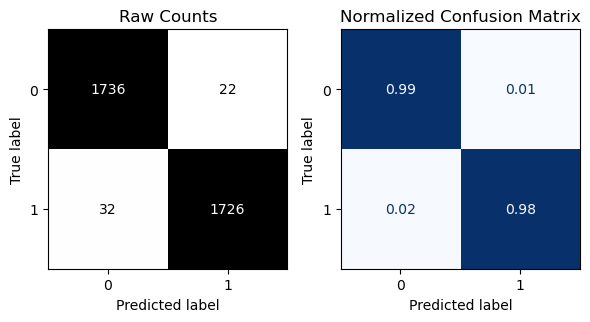


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.96      0.97      3231
           1       0.81      0.95      0.88       599

    accuracy                           0.96      3830
   macro avg       0.90      0.95      0.93      3830
weighted avg       0.96      0.96      0.96      3830



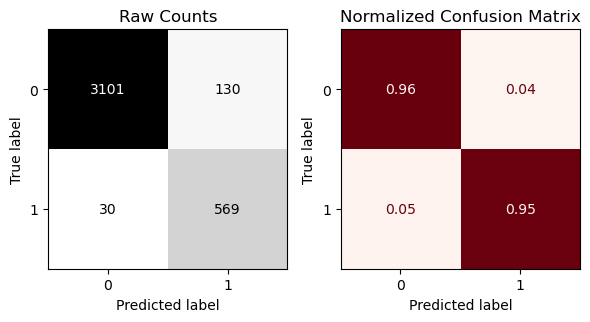

In [14]:
# Create a pipeline with a vectorizer and classification model.
nb_pipe = Pipeline([('vectorizer', CountVectorizer(stop_words="english")),
                     ('clf',MultinomialNB())])
# clf_nb = MultinomialNB()
nb_pipe.fit(X_train, y_train)
fn.evaluate_classification(nb_pipe, X_train,y_train, X_test, y_test)


----------------------------------------------------------------------
 Classification Metrics: 
----------------------------------------------------------------------
              precision    recall  f1-score   support

  Five Stars       0.99      0.96      0.97      3231
    One Star       0.81      0.95      0.88       599

    accuracy                           0.96      3830
   macro avg       0.90      0.95      0.93      3830
weighted avg       0.96      0.96      0.96      3830





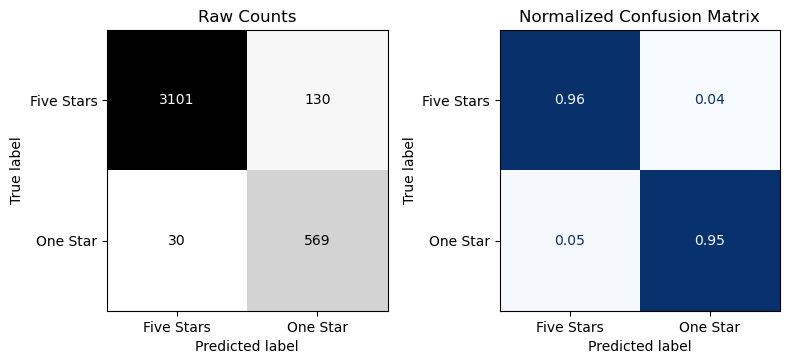

In [25]:
y_pred = nb_pipe.predict(X_test)
report, conf_mat = fn.classification_metrics_streamlit(y_test, y_pred, class_names=class_names)
print(report)

### Tensorflow

In [15]:
# Make a dataset object from train data
train_tf = tf.data.Dataset.from_tensor_slices((X_train, y_train))
# Make a dataset object from test data
test_tf = tf.data.Dataset.from_tensor_slices((X_test, y_test))

# Shuffle dataset
train_tf = train_tf.shuffle(buffer_size=len(train_tf),reshuffle_each_iteration=False)


In [16]:

# Set the ratio of the train, validation, test split
split_train = .75
split_val =  .25
# Calculate the number of samples for training and validation data 
n_train_samples =  int(len(train_tf) * split_train)
n_val_samples = int(len(train_tf) * split_val)

# Set the batch size
BATCH_SIZE =32
import math

# math.ceil will round up
# How many batches? 
n_train_batches = math.ceil(n_train_samples/BATCH_SIZE)
n_val_batches = math.ceil(n_val_samples/BATCH_SIZE)
print(f"    - train:\t{n_train_samples} samples \t({n_train_batches} batches)")
print(f"    - val:  \t{n_val_samples} samples \t({n_val_batches} batches)")

# Use take and skip to define each set
train_ds = train_tf.take(n_train_samples).batch(batch_size=BATCH_SIZE)
# Skip over the training batches and take the validation batches
val_ds = train_tf.skip(n_train_samples).take(n_val_samples).batch(batch_size=BATCH_SIZE)

# Confirm the number of batches in each
print (f' There are {len(train_ds)} training batches.')
print (f' There are {len(val_ds)} validation batches.')



    - train:	2637 samples 	(83 batches)
    - val:  	879 samples 	(28 batches)
 There are 83 training batches.
 There are 28 validation batches.


In [17]:
# Put the test data into batches also
test_ds = test_tf.batch(batch_size = BATCH_SIZE)
# How many batches
print (f' There are {len(test_ds)} testing batches.')


 There are 120 testing batches.


In [18]:
# Get a single element
example_x, example_y = train_ds.take(1).get_single_element()
example_y


<tf.Tensor: shape=(32,), dtype=int64, numpy=
array([0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1])>

In [19]:
# Define sequence length as a variable for future use
SEQUENCE_LENGTH = 400
# Define vectorizer layer. Use the custom function to build and fit the vectorizer before using it in model
sequence_vectorizer, vocab_lookup = fn.make_text_vectorization_layer(
    train_ds, output_mode="int", output_sequence_length=SEQUENCE_LENGTH, verbose=True
)



tf.keras.layers.TextVectorization(
{   'batch_input_shape': (None,),
    'dtype': 'string',
    'encoding': 'utf-8',
    'idf_weights': None,
    'max_tokens': None,
    'name': 'text_vectorization',
    'ngrams': None,
    'output_mode': 'int',
    'output_sequence_length': 400,
    'pad_to_max_tokens': False,
    'ragged': False,
    'sparse': False,
    'split': 'whitespace',
    'standardize': 'lower_and_strip_punctuation',
    'trainable': True,
    'vocabulary': None,
    'vocabulary_size': 10795}
)


2023-12-15 17:30:04.944773: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


In [20]:
from tensorflow.keras import layers, optimizers


def build_gru_model_stack_deep_pool(text_vectorization_layer):
    n_units = 64
    dropout_rate = .4
    
    VOCAB_SIZE = text_vectorization_layer.vocabulary_size()
        
    model = tf.keras.Sequential([
        text_vectorization_layer,
        layers.Embedding(input_dim=VOCAB_SIZE,
                                  output_dim=EMBED_DIM, 
                                  input_length=SEQUENCE_LENGTH)])

    # Stack three GrU layers    
    model.add(layers.GRU(n_units, return_sequences=True))
    model.add(layers.Dropout(dropout_rate))
    model.add(layers.GRU(n_units, return_sequences=True))
    model.add(layers.Dropout(dropout_rate))         
    # For the final GRU layer, use return_sequences = True for pooling layer
    model.add(layers.GRU(n_units, return_sequences = True)) 
    model.add(layers.GlobalMaxPooling1D())
    # Output layer
    model.add(layers.Dense(len(classes), 
                              activation='softmax'))

              
    # Define optimizer
    optimizer = optimizers.legacy.Adam()

    # Compile
    model.compile(optimizer=optimizer,  
                  loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    model.summary()
    return model


def get_callbacks(patience=3, monitor='val_accuracy'):
    early_stop = tf.keras.callbacks.EarlyStopping(patience=patience, monitor=monitor)
    return [early_stop]


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, 400)              0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 400, 100)          1079500   
                                                                 
 gru (GRU)                   (None, 400, 64)           31872     
                                                                 
 dropout (Dropout)           (None, 400, 64)           0         
                                                                 
 gru_1 (GRU)                 (None, 400, 64)           24960     
                                                                 
 dropout_1 (Dropout)         (None, 400, 64)           0         
                                                        

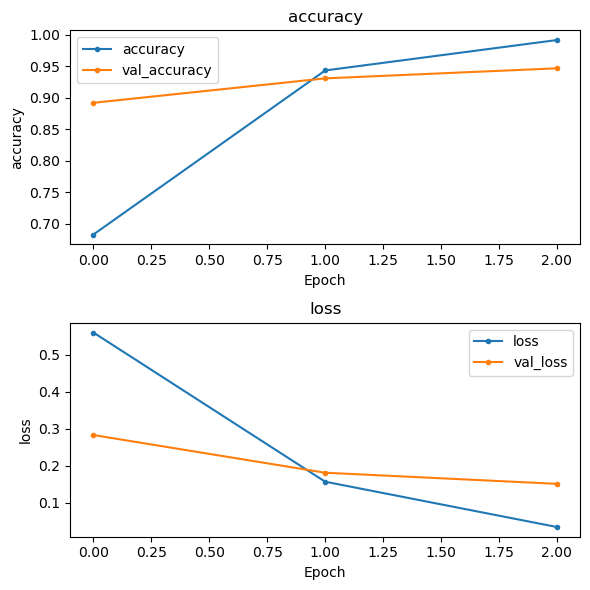


- Evaluating Network...
----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.92      0.95      3231
           1       0.69      0.95      0.80       599

    accuracy                           0.93      3830
   macro avg       0.84      0.94      0.88      3830
weighted avg       0.94      0.93      0.93      3830



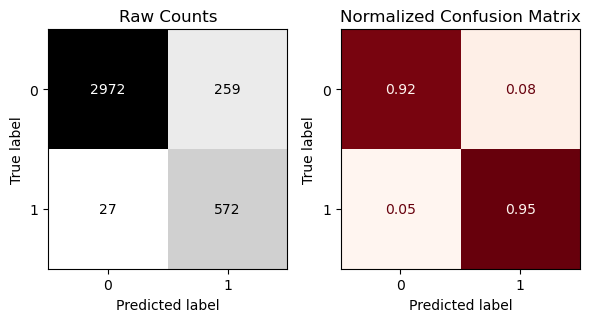


- Evaluating Test Data:
120/120 [==============================] - 8s 65ms/step - loss: 0.2293 - accuracy: 0.9253
{'loss': 0.22928237915039062, 'accuracy': 0.9253263473510742}


In [21]:
# Build model

EMBED_DIM = 100
model = build_gru_model_stack_deep_pool(sequence_vectorizer)

EPOCHS = 3#Lesson is 30
history = model.fit(
    train_ds,
    epochs=EPOCHS,
    validation_data=val_ds,
    callbacks=get_callbacks(),
)
results = fn.evaluate_classification_network(
    model,
    X_test=test_ds, history=history
);


In [28]:
fn

<module 'custom_functions' from '/Users/codingdojo/Documents/GitHub/_CURRICULUM/functions-from-curriculum/Course 06 - AML/custom_functions.py'>

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

  Five Stars       1.00      1.00      1.00      1323
    One Star       1.00      1.00      1.00      1314

    accuracy                           1.00      2637
   macro avg       1.00      1.00      1.00      2637
weighted avg       1.00      1.00      1.00      2637





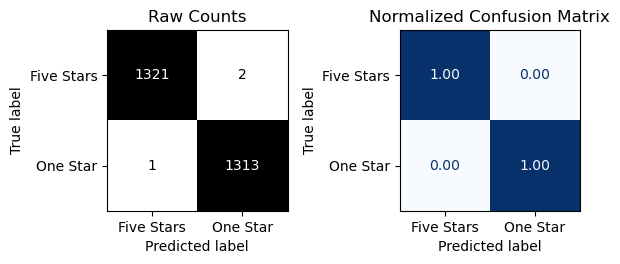

In [33]:
# pred_ds = model.predict(test_ds)
report, conf_mat = fn.classification_metrics_streamlit_tensorflow(model,X_train=train_ds, 
                                                                   class_names=class_names)
print(report)